# Simulation of Dual Mass Oscillator example with CoFmuPy

In [1]:
%reload_ext autoreload
%autoreload 2

from cofmupy.coordinator import Coordinator


In [2]:
coordinator = Coordinator()

fsolve_kwargs = {
    "solver": "fsolve",
    "time_step": 0.002,
    "xtol": 1e-5,
    "maxfev": 10000,
}

coordinator.start(
    conf_path="config.json",
    fixed_point_init=False,
    fixed_point_kwargs=fsolve_kwargs,
)

Skipping Fixed Point Initialization


In [3]:
coordinator.master._input_dict

{'System1': {'F': [0]}, 'System2': {'a1': [0], 'v1': [0], 'x1': [0]}}

In [ ]:
coordinator.graph_engine.plot_graph()

In [5]:
from tqdm import tqdm

communication_time_step = 0.002
coordinator.do_step(communication_time_step)
N = 5000  # Run N steps
for _ in tqdm(range(N)):
    coordinator.do_step(communication_time_step)

results = coordinator.master.get_results()

100%|██████████| 5000/5000 [00:00<00:00, 16342.45it/s]


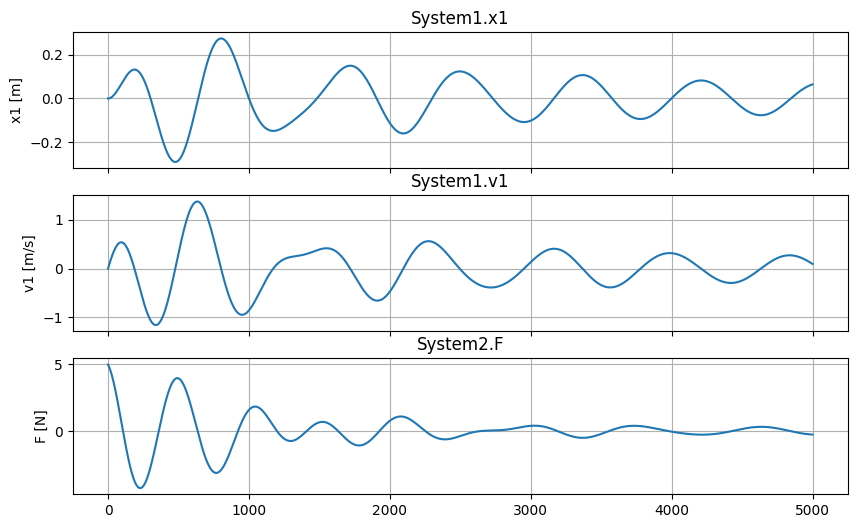

In [6]:
# plot the results
import matplotlib.pyplot as plt


fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

axs[0].plot(results[("System1", "x1")])
axs[0].set_ylabel("x1 [m]")
axs[0].set_title("System1.x1")
axs[0].grid()

axs[1].plot(results[("System1", "v1")])
axs[1].set_ylabel("v1 [m/s]")
axs[1].set_title("System1.v1")
axs[1].grid()

axs[2].plot(results[("System2", "F")])
axs[2].set_ylabel("F [N]")
axs[2].set_title("System2.F")
axs[2].grid()